# Defining the orbital plane with $i$ and $\Omega$
Here we discuss how the orbit plane orientation is defined. We also encourage you to play around with this  [interactive orbital elements notebook](https://github.com/sblunt/orbitize/blob/main/docs/tutorials/show-me-the-orbit.ipynb) to get a feel for the orbital elements. Also note that we refer to the values of the angles in degrees when discussing them but all angles are in radians in `orbitize!`. 

Inclination ($i$) and Position angle of the Ascending Node (PAN; $\Omega$) define the plane of the orbit in the sky. Inclination describes the tilt of the orbital plane relative to the plane in the sky, and PAN describes the rotation of the orbital plane in the plane of the sky. 

An intuitive way to think about it is in terms of spherical coordinates. $i$ is equivalent to $\theta$ (range from 0 to 180 deg), and $\Omega$ is equivalent to $\varphi$ (range from 0 to 360 deg) in common spherical notation. The sphere in this case is tilted, with one of the poles pointed towards us. 

## Why do we use a sine prior on inclination?

You might also hear about using a uniform prior in $\cos(i)$, which is an equivalent statement. We use a sine prior on inclination because our ultimate goal is to have an isotropic prior on the orbital plane, and due to how we choose coordiantes, this becomes a sine prior on inclination. We can go through some math/visual explaination, but the easiest is perhaps seeing the distribution of orbital plane orientations on a sphere. We use the orbital plane normal (perpendicular vector from the orbit plane) to define the orientation of the plane in 3D space. The normal points to a single point on a unit sphere. Isotropic distributions will uniformly cover the unit sphere. 

In the exercise below, if we randomly draw orbital plane orientations using either an uniform or sine prior for inclination, you'll see that the uniform prior causes more points to cluster near the poles, whereas the sine prior is more uniform. Note that generally the edges of the sphere look darker merely due to a viewing angle effect. 



Text(0.5, 0.92, 'Sine in inc')

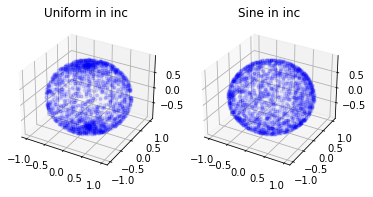

In [1]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from orbitize.priors import UniformPrior, SinPrior
%matplotlib inline

def spherical_to_xyz(theta, phi, rho=1):
    """
    Transformation with theta and phi in radians
    """
    z = rho * np.cos(theta)
    x = rho * np.sin(theta) * np.cos(phi)
    y = rho * np.sin(theta) * np.sin(phi)
    return x,y,z

fig = plt.figure()

# try a uniform distribution in both
ax1 = fig.add_subplot(121, projection='3d')

inc_uni_prior = UniformPrior(0, np.pi)
pan_uni_prior = UniformPrior(0, 2*np.pi)

incs_uni = inc_uni_prior.draw_samples(2000)
pan_uni = pan_uni_prior.draw_samples(2000)

x_uni, y_uni, z_uni = spherical_to_xyz(incs_uni, pan_uni)
ax1.plot(x_uni, y_uni, z_uni, 'b.', alpha=0.1)
ax1.set_title("Uniform in inc")

# try a sine distribution  for inclination
ax2 = fig.add_subplot(122, projection='3d')

inc_sine_prior = SinPrior()

incs_sine = inc_sine_prior.draw_samples(2000)

x_uni, y_uni, z_uni = spherical_to_xyz(incs_sine, pan_uni)
ax2.plot(x_uni, y_uni, z_uni, 'b.', alpha=0.1)
ax2.set_title("Sine in inc")

## What do the values of $i$ mean?
Inclination in `orbitize!` is defined to go from 0 to 180 degrees. Some other places use -90 to 90 instead, but -90 to 0 is the same as 90 to 180. There are actual a couple of quick things to learn about the orbit from the value of inclination. Here is a summary:

  * $i = 0^\circ$ : orbit is face-on and body orbits counterclockwise in the sky (North-up, East-left)
  * $0^\circ < i < 90^\circ$ : orbit is inclined and body orbits counterclockwise in the sky (North-up, East-left)
  * $i = 90^\circ$ : orbit is viewed edge-on
  * $90^\circ < i < 180^\circ$ : orbit is inclined and body orbits clockwise in the sky (North-up, East-left)
  * $i = 180^\circ$ : orbit is face-on and body orbits clockwise in the sky (North-up, East-left)

Here are some examples below:

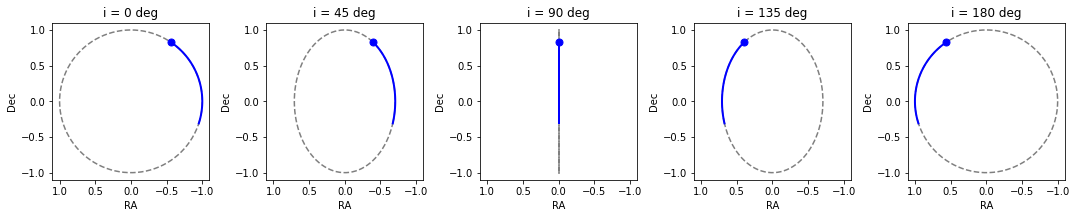

In [2]:
from orbitize.kepler import calc_orbit

sma = 1
ecc, pan, aop, plx, mtot = 0, 0, 0, 1, 1
tau = 0.3

incs = np.radians([0, 45, 90, 135, 180])

all_eps = np.linspace(0, 365.25, 200)
arc_eps = np.linspace(0, 75, 75)

fig = plt.figure(figsize=(15,4))
for i, inc in enumerate(incs):
    ax = fig.add_subplot(1, 5, i+1)

    all_ras, all_decs, _ = calc_orbit(all_eps, sma, ecc, inc, aop, pan, tau, plx, mtot, tau_ref_epoch=0)
    ax.plot(all_ras, all_decs, 'k--', alpha=0.5)

    arc_ras, arc_decs, _ = calc_orbit(arc_eps, sma, ecc, inc, aop, pan, tau, plx, mtot, tau_ref_epoch=0)
    ax.plot(arc_ras, arc_decs, 'b-', linewidth=2)
    ax.plot(arc_ras[-1], arc_decs[-1], 'bo', markersize=7)
    
    ax.set_title("i = {0:d} deg".format(int(np.degrees(inc))))
    ax.set_aspect("equal")
    ax.set_xlim([1.1, -1.1])
    ax.set_ylim([-1.1, 1.1])
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    
fig.tight_layout()

## What do the values of $\Omega$ mean?
$\Omega$ or PAN defines the rotation of the orbit in the plane of the sky. Increasing PAN will rotate your orbit counterclockwise in the sky. Here are some examples:

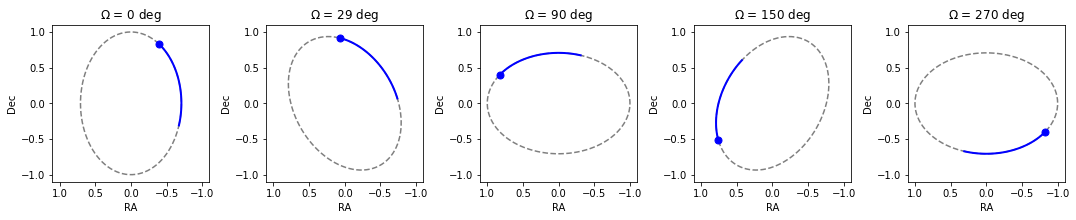

In [3]:
sma = 1
ecc, aop, plx, mtot = 0, 0, 1, 1
inc = np.pi/4 # 45 degrees
tau = 0.3

pans = np.radians([0, 30, 90, 150, 270])

all_eps = np.linspace(0, 365.25, 200)
arc_eps = np.linspace(0, 75, 75)

fig = plt.figure(figsize=(15,4))
for i, pan in enumerate(pans):
    ax = fig.add_subplot(1, 5, i+1)

    all_ras, all_decs, _ = calc_orbit(all_eps, sma, ecc, inc, aop, pan, tau, plx, mtot, tau_ref_epoch=0)
    ax.plot(all_ras, all_decs, 'k--', alpha=0.5)

    arc_ras, arc_decs, _ = calc_orbit(arc_eps, sma, ecc, inc, aop, pan, tau, plx, mtot, tau_ref_epoch=0)
    ax.plot(arc_ras, arc_decs, 'b-', linewidth=2)
    ax.plot(arc_ras[-1], arc_decs[-1], 'bo', markersize=7)
    
    ax.set_title(r"$\Omega$ = {0:d} deg".format(int(np.degrees(pan))))
    ax.set_aspect("equal")
    ax.set_xlim([1.1, -1.1])
    ax.set_ylim([-1.1, 1.1])
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    
fig.tight_layout()